In [1]:
#Loading in code and data
from kinetic import KineticScan
from spatialScan import SpatialScan
from ss import SpatiallySeparated
import matplotlib.pyplot as plt
import glob
import re
import numpy as np
import time

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

In [2]:
#Getting all data
file = glob.glob('**/*.dat', recursive=True)
AllDataObjs = []

for fpath in file:
    try:
        #Getting the file name and trimming .dat extention and /
        fname = re.search('[\\\/][^\\\/\n]+.dat', fpath)[0][1:-4]
        print(fname)
    except:
        print(f'ERROR: Could not open {fpath}: Bad re exspression')
        continue
        
    try:
        if 'KIN' in fname:
            data = KineticScan(filepath=fpath, label=fname)
        else:
            data = SpatialScan(filepath=fpath, label=fname)
        AllDataObjs.append(data)
    except Exception as e:
        print(f'ERROR: Could not read {fpath}: {e.__class__}')
        print(e)

print(f'--------------------------\nSuccesfully Loaded in {len(AllDataObjs)} .dat files')

D5-R2-PDI-Nanocrystal-6-14-21-t0 _GV
D5-R2-PDI-Nanocrystal-6-14-21-t0 _KIN
D5-R3-PDI-Nanocrystal-6-14-21 _KIN
D5-R3-PDI-Nanocrystal-6-14-21-t0_GV
D5-R3-PDI-Nanocrystal-6-14-21-t0_KIN
D1-PDI-Nanocrystal-r1_GV
D1-PDI-Nanocrystal-r1_KIN
D1-PDI-Nanocrystal-r1_NP
D2-PDI-Nanocrystal-6-11-21 kin2_GV
D2-PDI-Nanocrystal-6-11-21 kin2_KIN
D2-PDI-Nanocrystal-6-11-21 kin2_NP
D2-PDI-Nanocrystal-6-11-21 t0_GV
D2-PDI-Nanocrystal-6-11-21 _NP
D2-PDI-Nanocrystal-6-11-21_KIN
D3-PDI-Nanocrystal-6-11-21 12.8uW r2_KIN
D3-PDI-Nanocrystal-6-11-21 12.8uW r3_KIN
D3-PDI-Nanocrystal-6-11-21 12.8uW_KIN
D3-PDI-Nanocrystal-6-11-21 5uW r1_KIN
D3-PDI-Nanocrystal-6-11-21 5uW r2_KIN
D3-PDI-Nanocrystal-6-11-21 5uW r3_KIN
D3-PDI-Nanocrystal-6-11-21 8.8uW r1_KIN
D3-PDI-Nanocrystal-6-11-21 8.8uW r2_KIN
D3-PDI-Nanocrystal-6-11-21 8.8uW r3_KIN
D3-PDI-Nanocrystal-6-11-21 r2_KIN
D3-PDI-Nanocrystal-6-11-21 r3_KIN
D3-PDI-Nanocrystal-6-11-21 _GV
D3-PDI-Nanocrystal-6-11-21 _KIN
D3-PDI-Nanocrystal-6-11-21 _NP
D4-PDI-Nanocrystal-6-11-

D5-R2-PDI-Nanocrystal-6-14-21-t0 _GV; 0


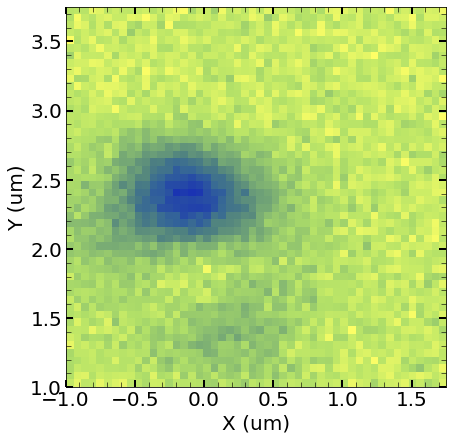

D5-R2-PDI-Nanocrystal-6-14-21-t0 _KIN; 1


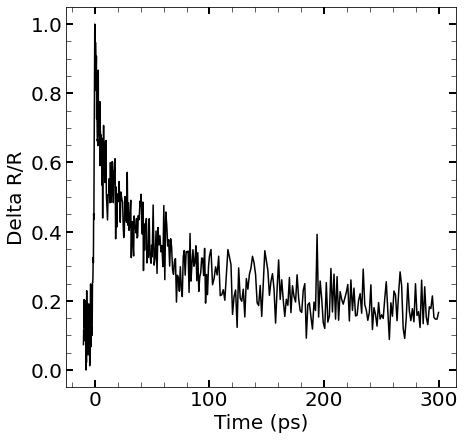

D5-R3-PDI-Nanocrystal-6-14-21 _KIN; 2


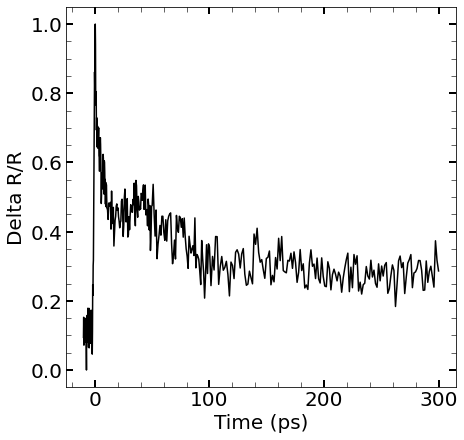

D5-R3-PDI-Nanocrystal-6-14-21-t0_GV; 3


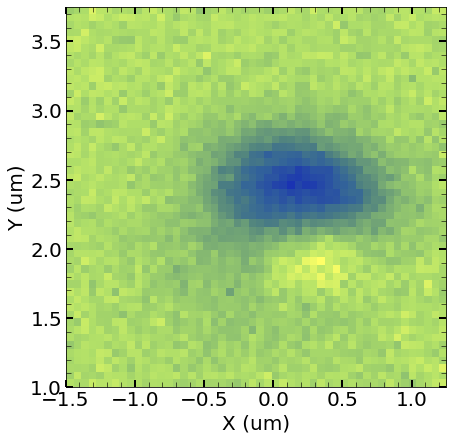

D5-R3-PDI-Nanocrystal-6-14-21-t0_KIN; 4


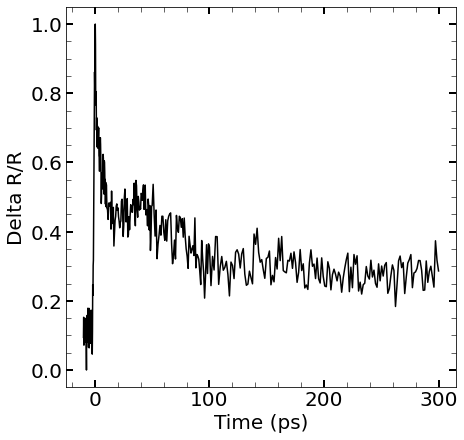

D1-PDI-Nanocrystal-r1_GV; 5


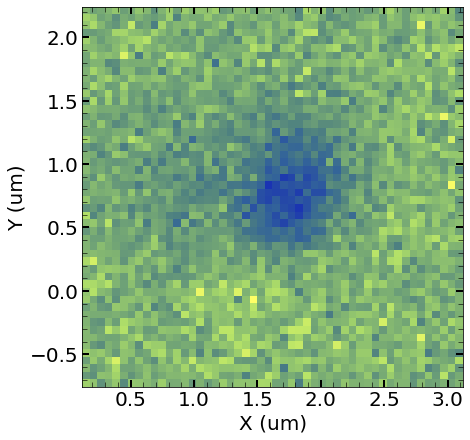

D1-PDI-Nanocrystal-r1_KIN; 6


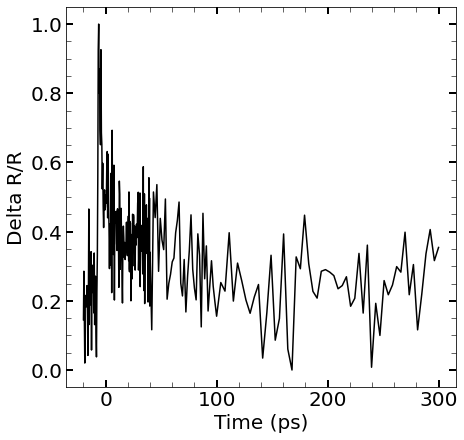

D1-PDI-Nanocrystal-r1_NP; 7


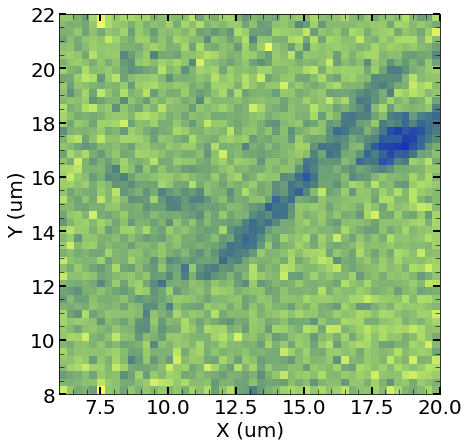

D2-PDI-Nanocrystal-6-11-21 kin2_GV; 8


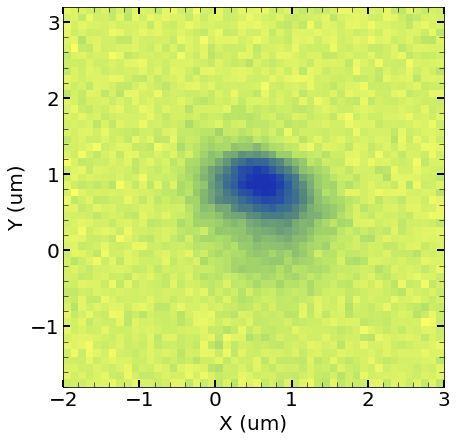

D2-PDI-Nanocrystal-6-11-21 kin2_KIN; 9


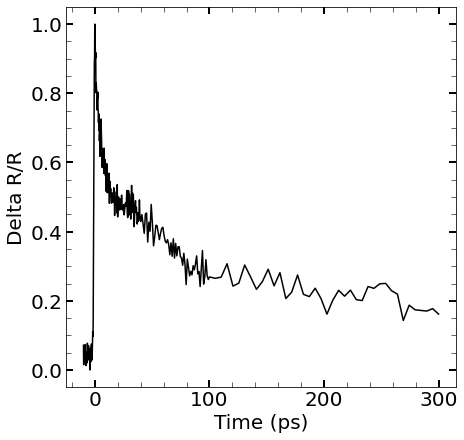

D2-PDI-Nanocrystal-6-11-21 kin2_NP; 10


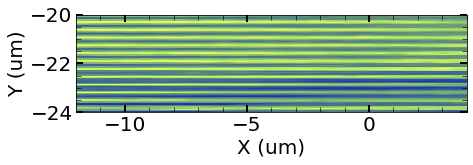

D2-PDI-Nanocrystal-6-11-21 t0_GV; 11


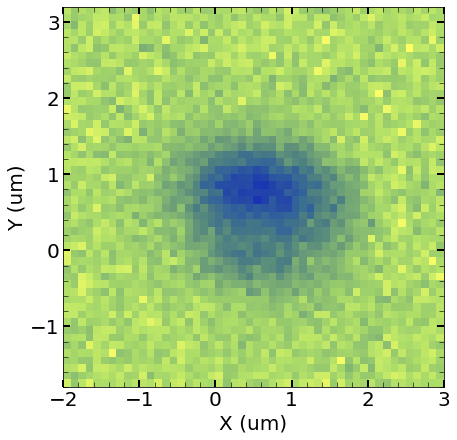

D2-PDI-Nanocrystal-6-11-21 _NP; 12


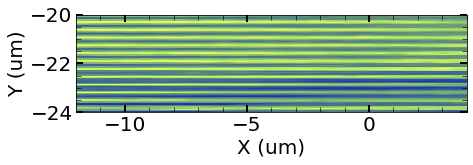

D2-PDI-Nanocrystal-6-11-21_KIN; 13


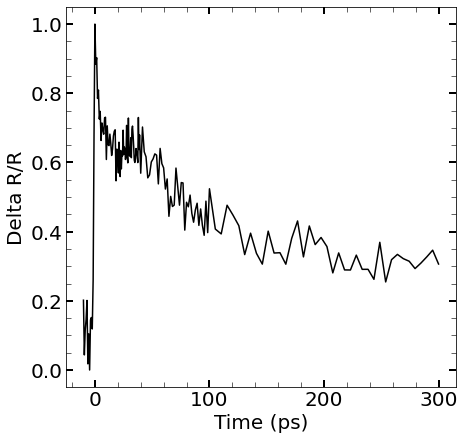

D3-PDI-Nanocrystal-6-11-21 12.8uW r2_KIN; 14


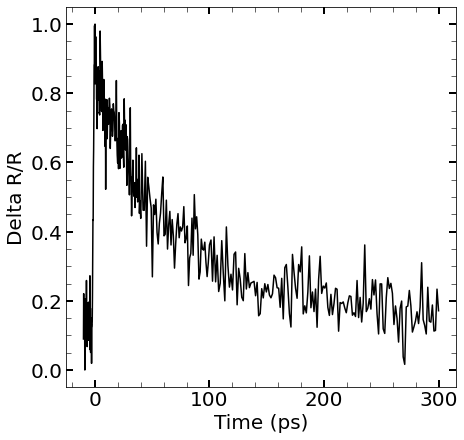

D3-PDI-Nanocrystal-6-11-21 12.8uW r3_KIN; 15


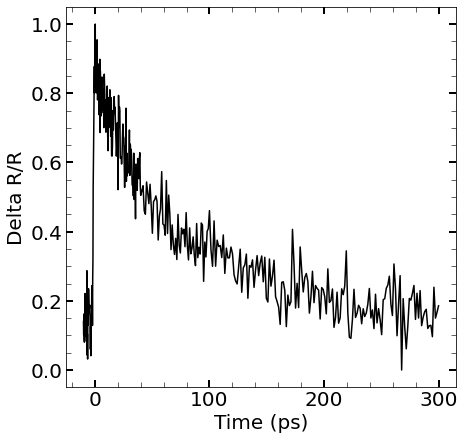

D3-PDI-Nanocrystal-6-11-21 12.8uW_KIN; 16


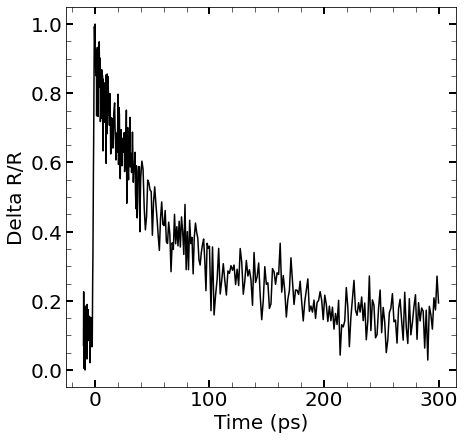

D3-PDI-Nanocrystal-6-11-21 5uW r1_KIN; 17


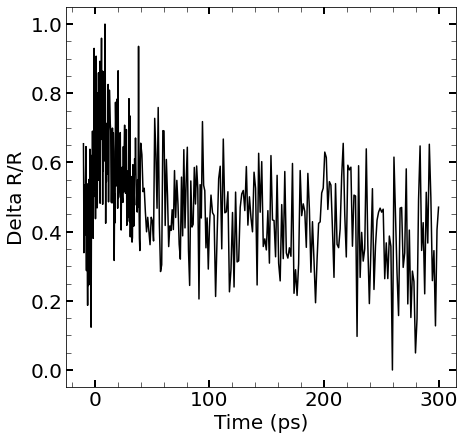

D3-PDI-Nanocrystal-6-11-21 5uW r2_KIN; 18


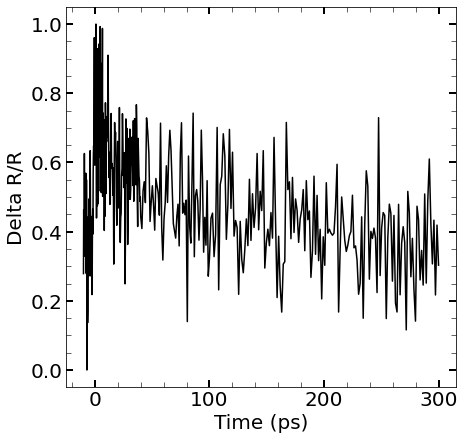

D3-PDI-Nanocrystal-6-11-21 5uW r3_KIN; 19


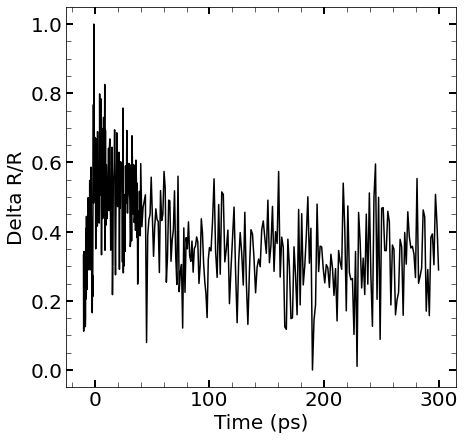

D3-PDI-Nanocrystal-6-11-21 8.8uW r1_KIN; 20


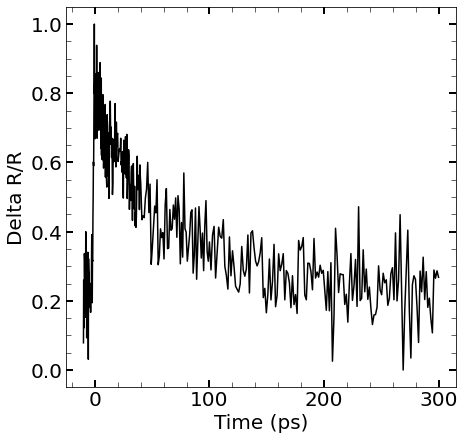

D3-PDI-Nanocrystal-6-11-21 8.8uW r2_KIN; 21


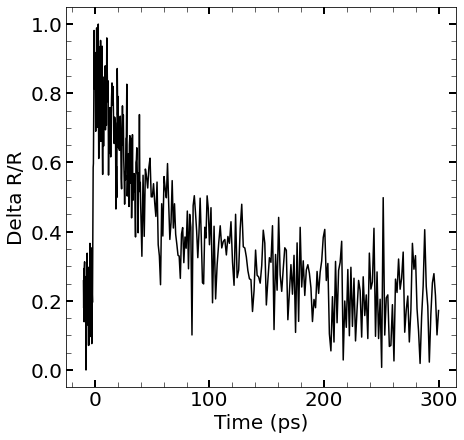

D3-PDI-Nanocrystal-6-11-21 8.8uW r3_KIN; 22


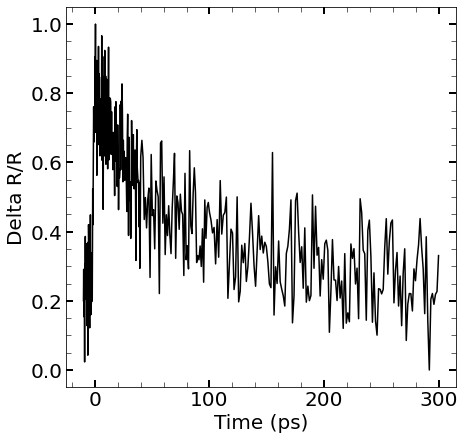

D3-PDI-Nanocrystal-6-11-21 r2_KIN; 23


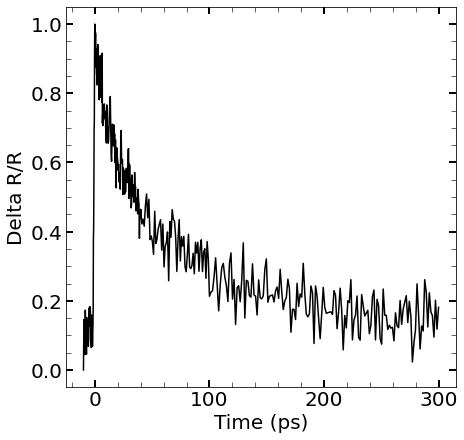

D3-PDI-Nanocrystal-6-11-21 r3_KIN; 24


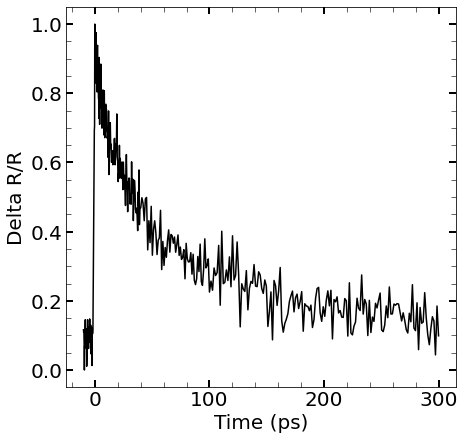

D3-PDI-Nanocrystal-6-11-21 _GV; 25


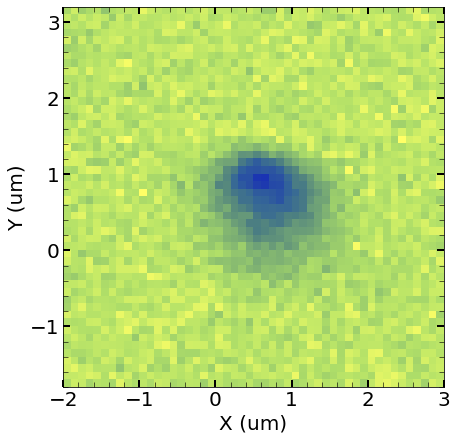

D3-PDI-Nanocrystal-6-11-21 _KIN; 26


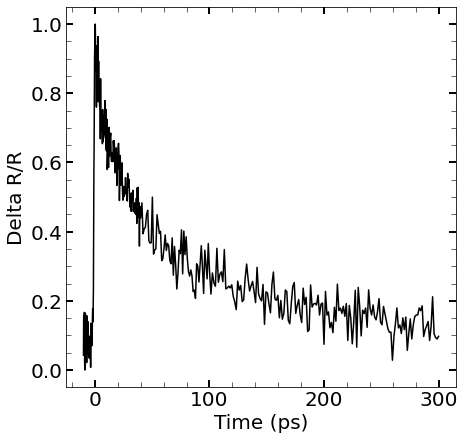

D3-PDI-Nanocrystal-6-11-21 _NP; 27


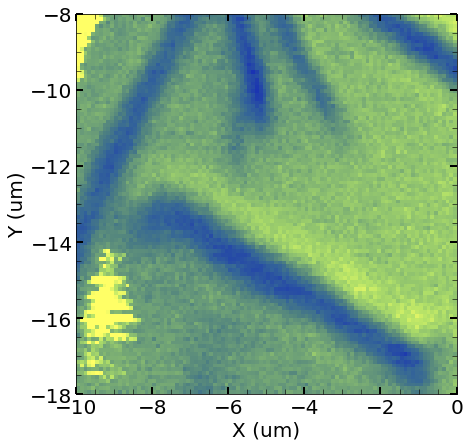

D4-PDI-Nanocrystal-6-11-21 5uW r3_Multi-1_KIN; 28


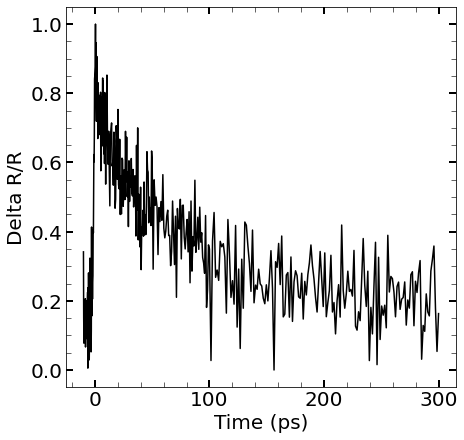

D4-PDI-Nanocrystal-6-11-21 5uW r3_Multi-1_NP; 29


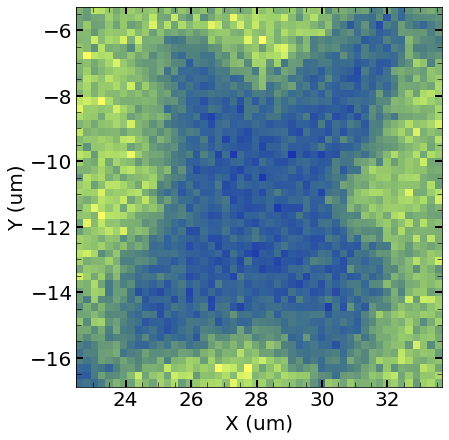

D4-PDI-Nanocrystal-6-11-21 5uW r3_Multi-2_KIN; 30


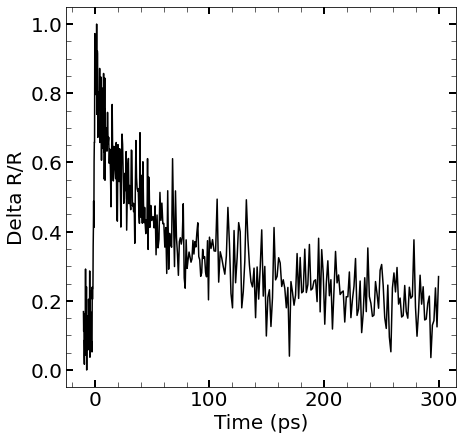

D4-PDI-Nanocrystal-6-11-21 5uW r3_Multi-2_NP; 31


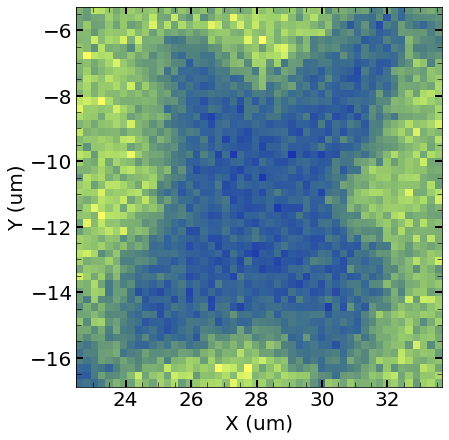

D4-PDI-Nanocrystal-6-11-21 5uW r3_Multi-3_KIN; 32


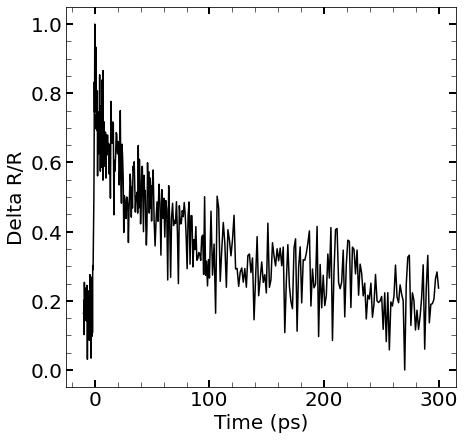

D4-PDI-Nanocrystal-6-11-21 5uW r3_Multi-3_NP; 33


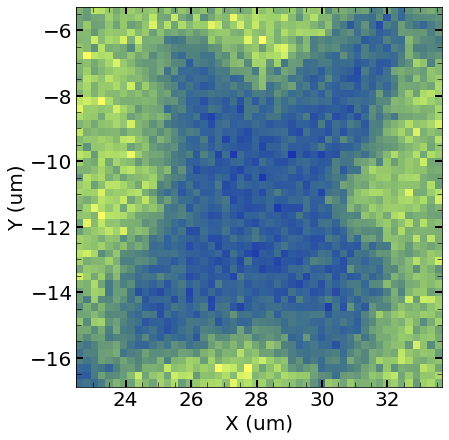

D4-PDI-Nanocrystal-6-14-21-t0_GV; 34


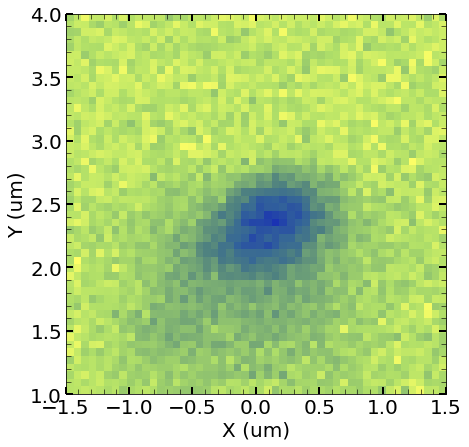

D4-PDI-Nanocrystal-6-14-21_NP; 35


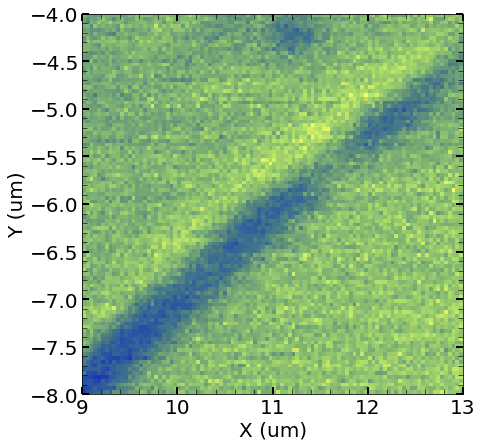

D5-R1-PDI-Nanocrystal-6-14-21-t0 k1_KIN; 36


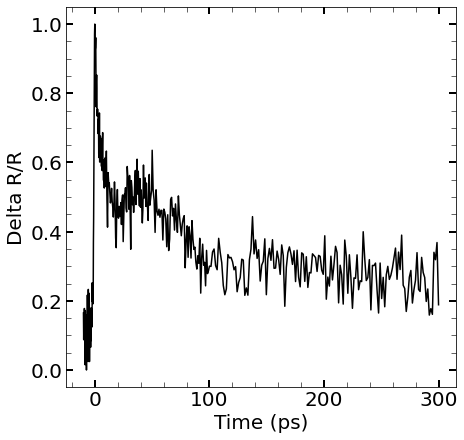

D5-R1-PDI-Nanocrystal-6-14-21-t0 k2_KIN; 37


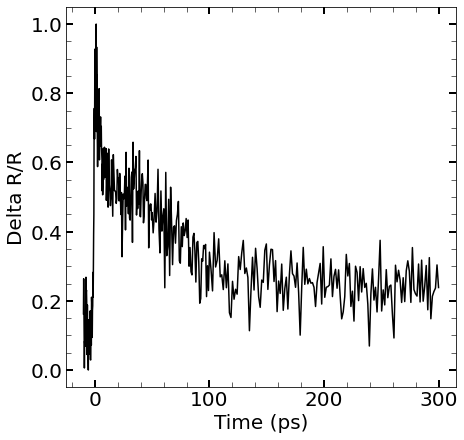

D5-R1-PDI-Nanocrystal-6-14-21-t0_GV; 38


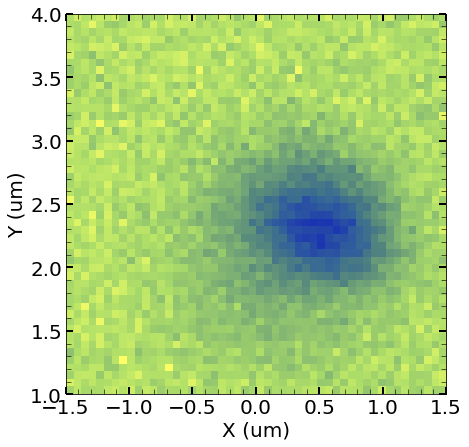

D5-R1-PDI-Nanocrystal-6-14-21-t0_NP; 39


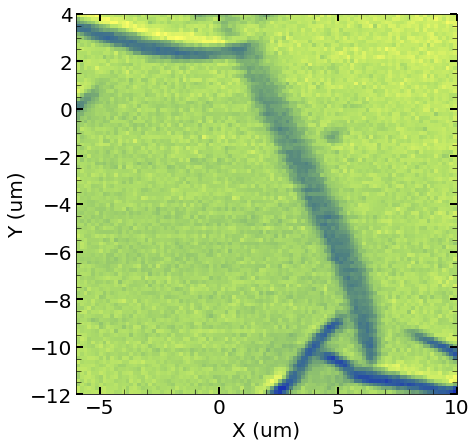

D1-PDI-Nanocrystal-r1_NP; 124


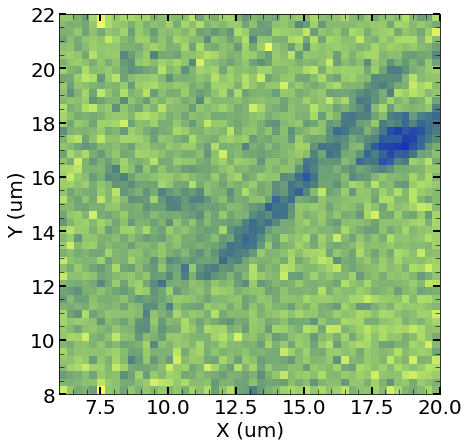

D5-R1-PDI-Nanocrystal-6-14-21-t0 k2_KIN; 125


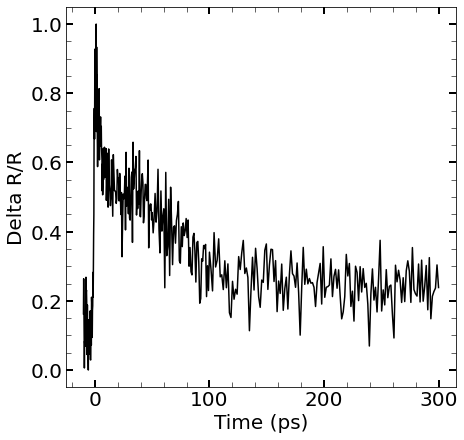

D5-R1-PDI-Nanocrystal-6-14-21-t0_GV; 126


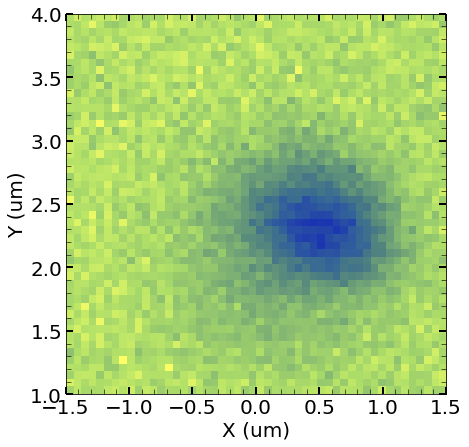

D5-R1-PDI-Nanocrystal-6-14-21-t0_NP; 127


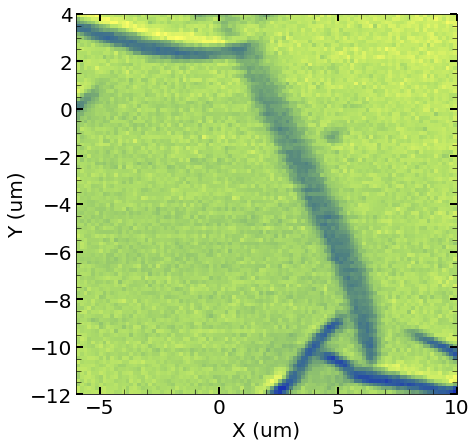

D5-R2-PDI-Nanocrystal-6-14-21-t0 _KIN; 128


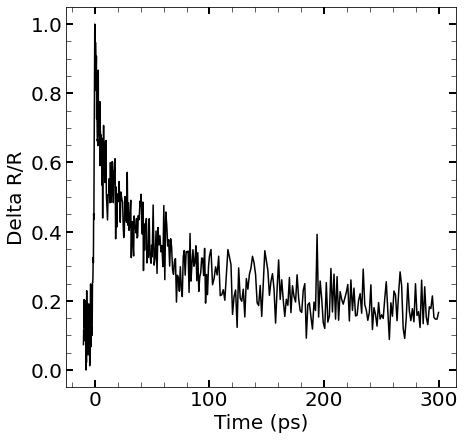

KIN-s2_GV; 129


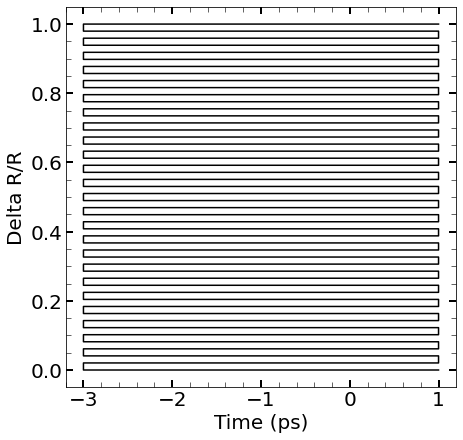

KIN-s2_KIN; 130


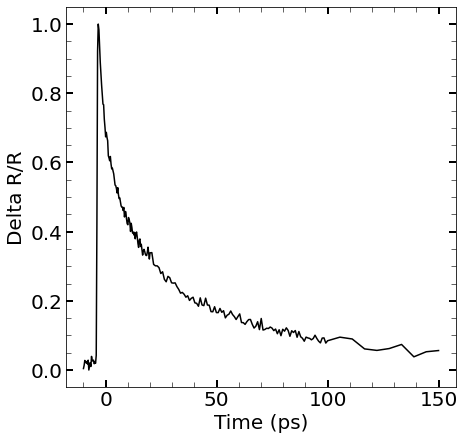

KIN_KIN; 131


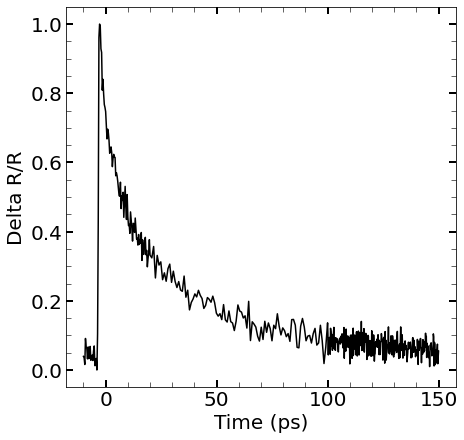

Rod 1 3uW_NP; 151


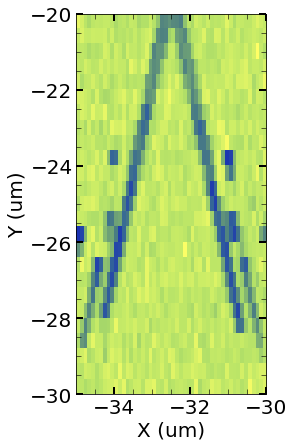

Rod 2 1.5uW_GV; 160


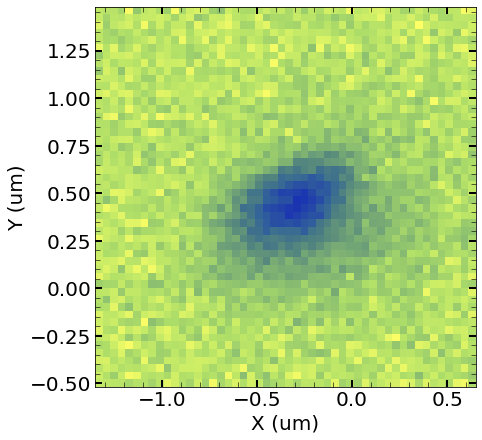

Rod 2 1.5uW_KIN; 161


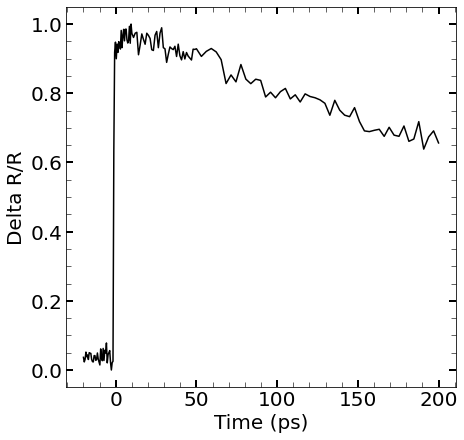

Rod 2 1.5uW_NP; 162


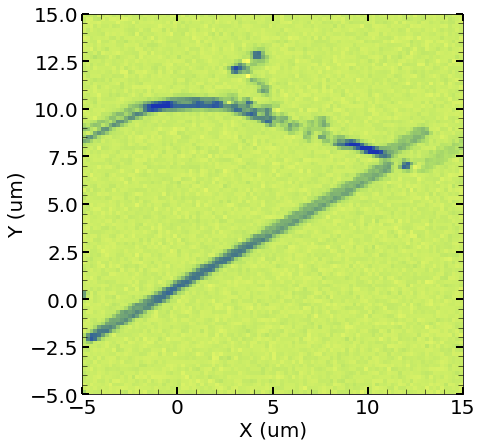

Rod 2 spot2int 1.5uW_GV; 171


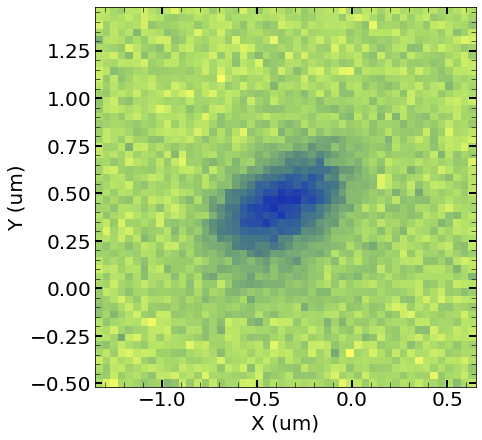

Imaged 172 .dat files in -8.363330602645874 s


In [7]:
#Plotting all D5 data to be looked through
start = time.time()

for i, o in enumerate(AllDataObjs):
    if 'AutoGalvo' not in o.get_label():
        print(f'{o.get_label()}; {i}')
        ax = o.visualize()
        plt.show()
    
elapsed = start - time.time()

print(f'Imaged {len(AllDataObjs)} .dat files in {elapsed} s')
    

D5-R2-PDI-Nanocrystal-6-14-21-t0 _GV; 0
D5-R2-PDI-Nanocrystal-6-14-21-t0 _KIN; 1
D5-R3-PDI-Nanocrystal-6-14-21 _KIN; 2
D5-R3-PDI-Nanocrystal-6-14-21-t0_GV; 3


C:\Users\Emerson Wright\Documents\01. REU Materials\Data-Analysis-Tools\kinetic.py:68: RuntimeWarning: overflow encountered in exp
  res = y0 + A1*np.exp((-(x-x0))/r1) + A2*np.exp((-(x-x0))/r2)


D5-R3-PDI-Nanocrystal-6-14-21-t0_KIN; 4
D5-R1-PDI-Nanocrystal-6-14-21-t0 k1_KIN; 36


C:\Users\Emerson Wright\Documents\01. REU Materials\Data-Analysis-Tools\kinetic.py:68: RuntimeWarning: overflow encountered in exp
  res = y0 + A1*np.exp((-(x-x0))/r1) + A2*np.exp((-(x-x0))/r2)
C:\Users\Emerson Wright\Documents\01. REU Materials\Data-Analysis-Tools\kinetic.py:68: RuntimeWarning: overflow encountered in exp
  res = y0 + A1*np.exp((-(x-x0))/r1) + A2*np.exp((-(x-x0))/r2)


D5-R1-PDI-Nanocrystal-6-14-21-t0 k2_KIN; 37
D5-R1-PDI-Nanocrystal-6-14-21-t0_GV; 38
D5-R1-PDI-Nanocrystal-6-14-21-t0_NP; 39
D5-R1-PDI-Nanocrystal-6-14-21-t0 k2_KIN; 125
D5-R1-PDI-Nanocrystal-6-14-21-t0_GV; 126
D5-R1-PDI-Nanocrystal-6-14-21-t0_NP; 127
D5-R2-PDI-Nanocrystal-6-14-21-t0 _KIN; 128


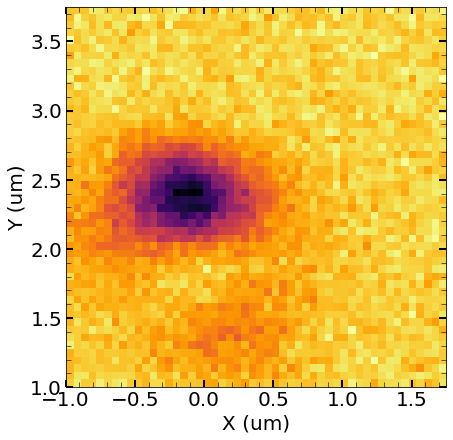

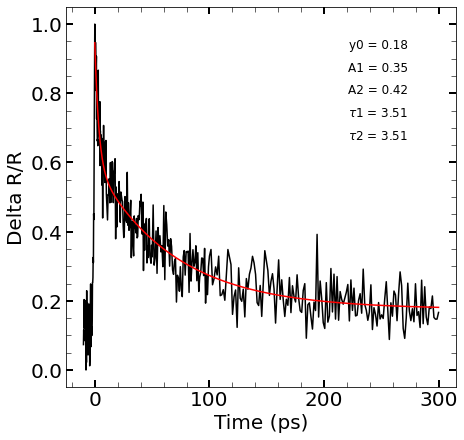

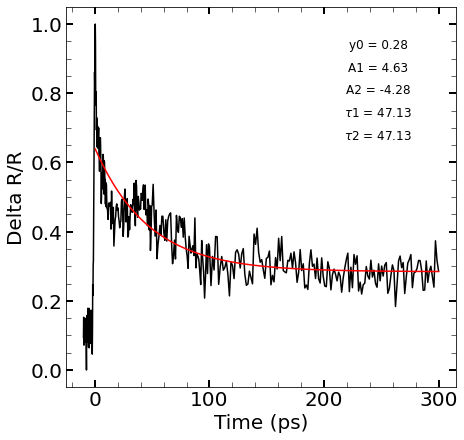

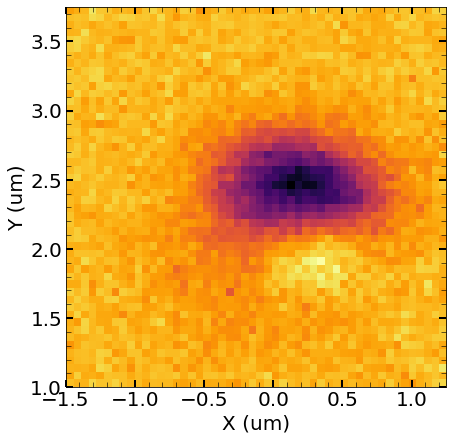

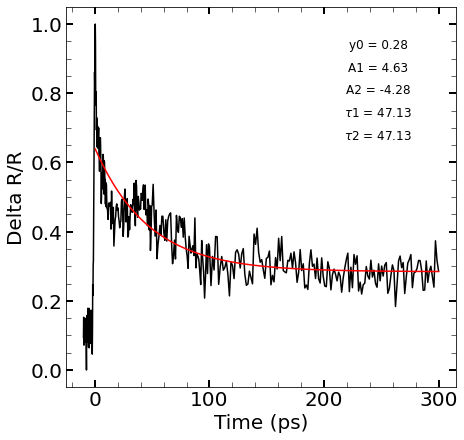

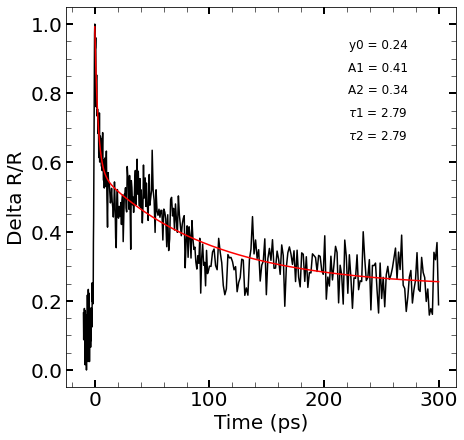

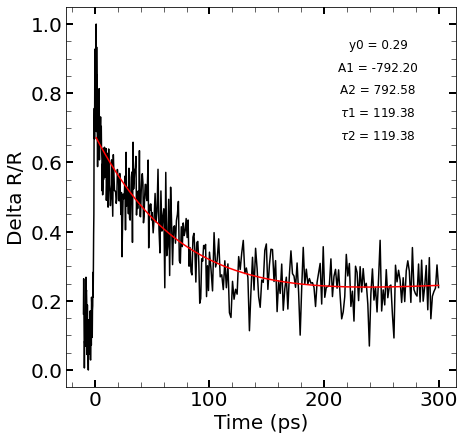

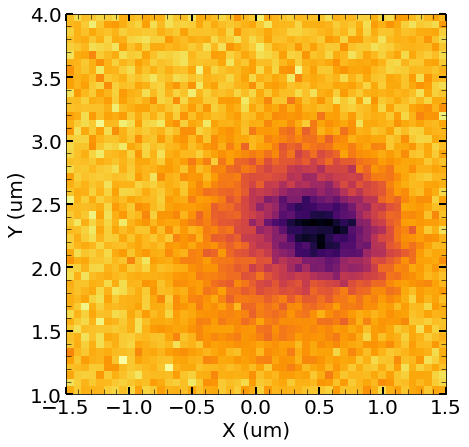

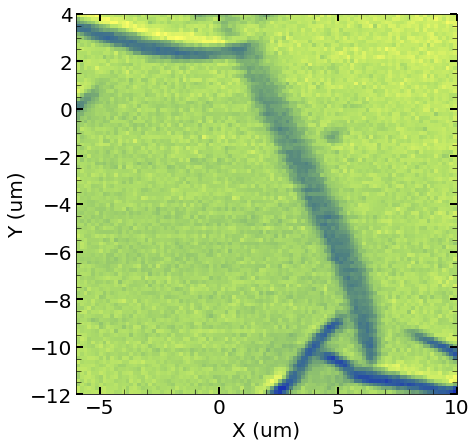

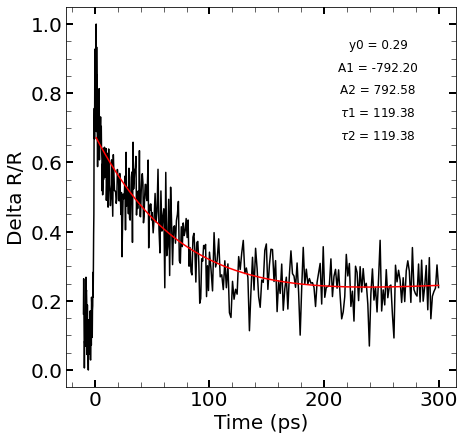

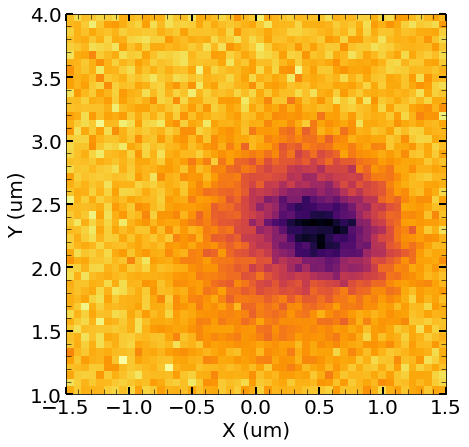

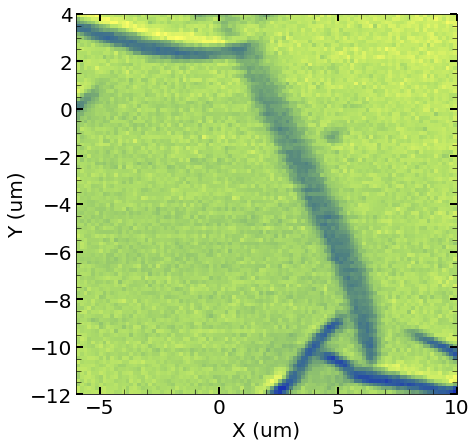

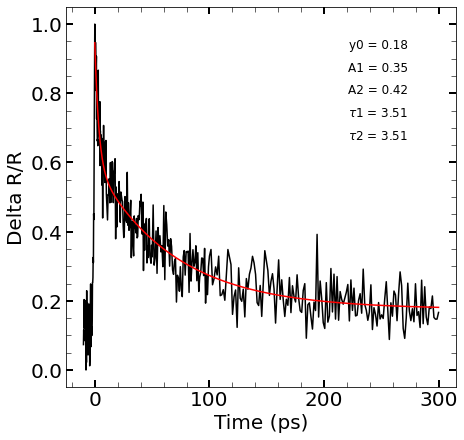

In [4]:
#Saving t0 scans

for i, o in enumerate(AllDataObjs):
    fname = o.get_label()
    if 'AutoGalvo' in fname or 'D5' not in fname:
        continue
    print(f'{fname}; {i}')
    if 'GV' in fname:
        ax = o.visualize(cmap='inferno')
    else:
        ax = o.visualize()
    if 'KIN' in fname:
        params = o.fitCurve()
        o.plotFit(params, ax=ax)
    plt.savefig(f'outputs/{fname}.png')



In [5]:
#Getting all the spots of D5 in the right order
spots = [[],[],[]]
sort = [[],[],[]]

for o in AllDataObjs:
    fname = o.get_label()
    if 'AutoGalvo' in fname and 'D5' in fname and 'GV' in fname:
        R = int(fname[1])-1
        spots[R].append(o)
        t = re.search('t-\d+', fname)[0][2:]
        sort[R].append(int(t))

spots = np.array(spots)
sort = np.array(sort)

for i, s in enumerate(sort):
    sortedIDX = np.argsort(s)
    print(sortedIDX)
    spots[i, :] =  spots[i,sortedIDX]
    for l in spots[i]:
        print(l.label)

[3 5 1 2 4 6 0]
R1_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-1ps_GV
R1_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-5ps_GV
R1_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-10ps_GV
R1_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-15ps_GV
R1_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-40ps_GV
R1_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-80ps_GV
R1_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-100ps_GV
[3 5 1 2 4 6 0]
R2_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-1ps_GV
R2_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-5ps_GV
R2_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-10ps_GV
R2_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-15ps_GV
R2_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-40ps_GV
R2_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-80ps_GV
R2_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-100ps_GV
[3 5 1 2 4 6 0]
R3_D5-PDI-Nanocrystal-6-14-21 R3_AutoGalvo_t-1ps_GV
R3_D5-PDI-Nanocrystal-6-14-21 R3_AutoGalvo_t-5ps_GV
R3_D5-PDI-Nanocrystal-6-14-21 R3_AutoGalvo_t-10ps_GV
R3_D5-PDI-Nanocrystal-6-14-21 R3_AutoGalvo_t-15ps_GV
R3_D5-PDI-Nanocrystal-6-14-21 

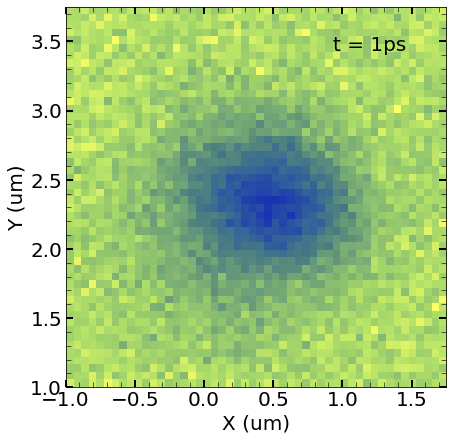

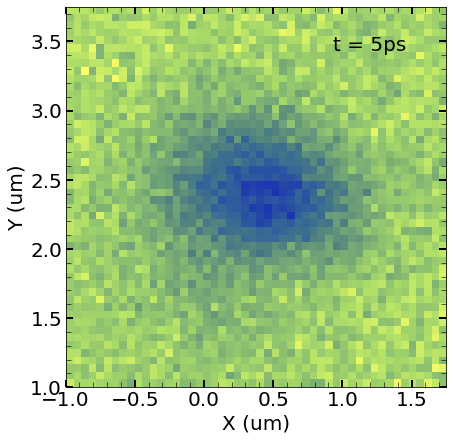

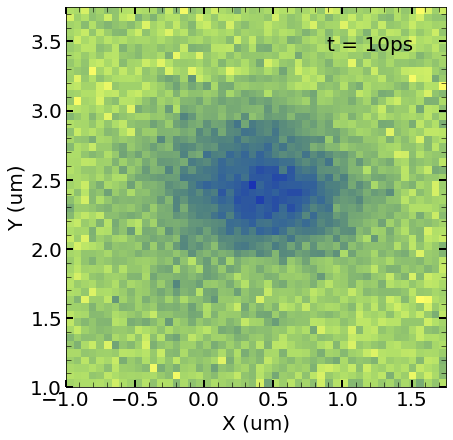

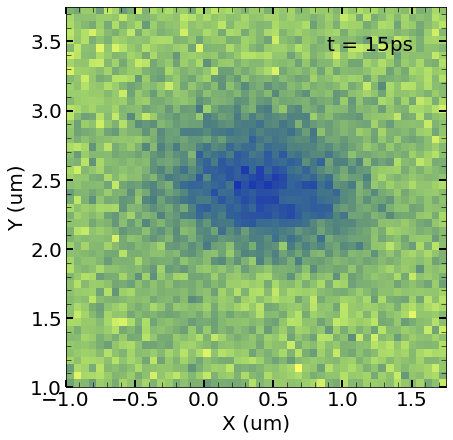

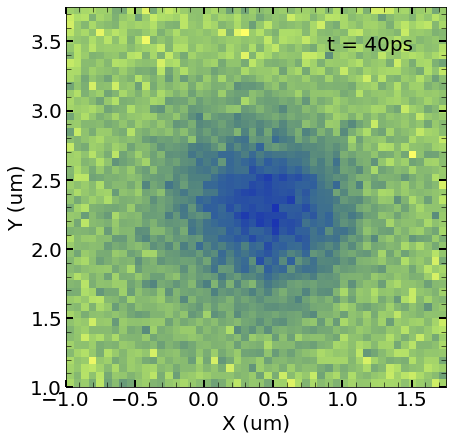

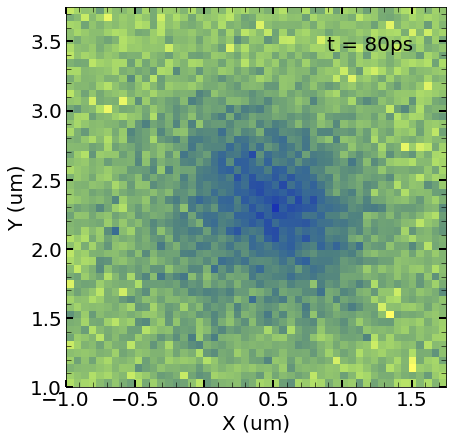

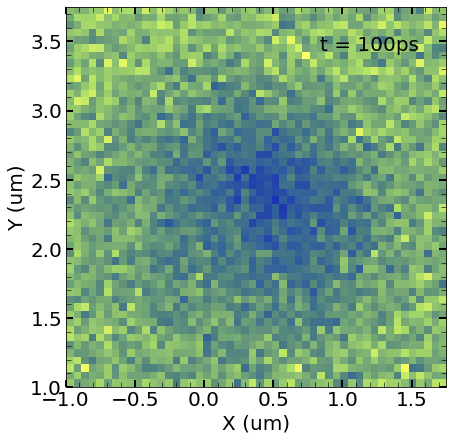

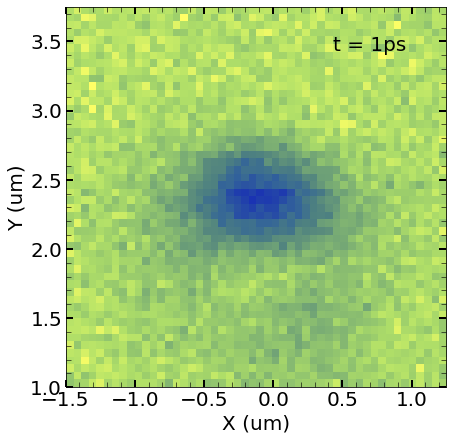

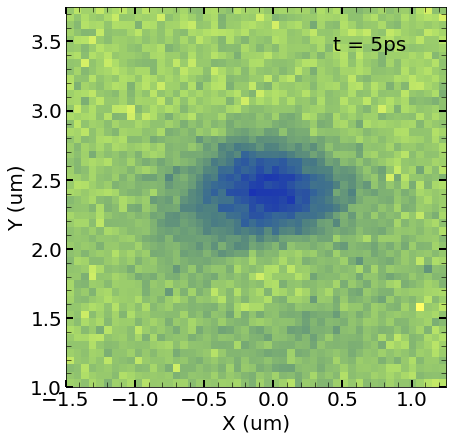

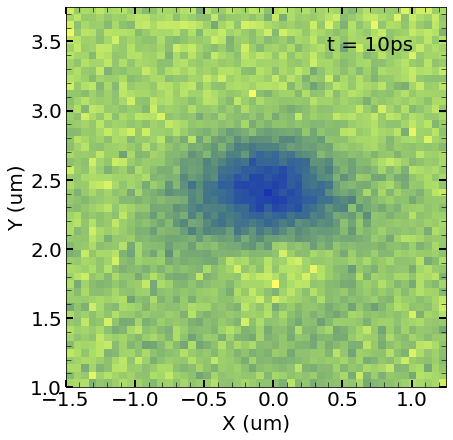

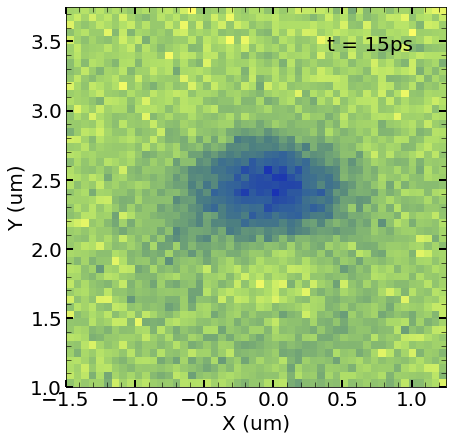

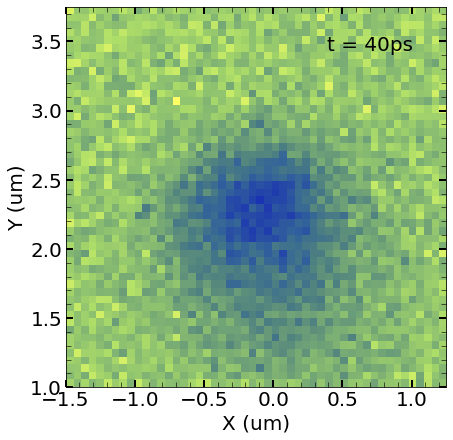

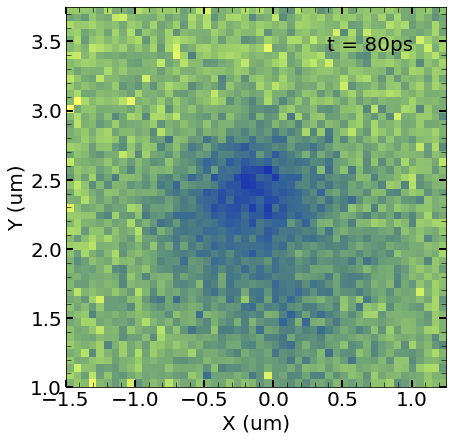

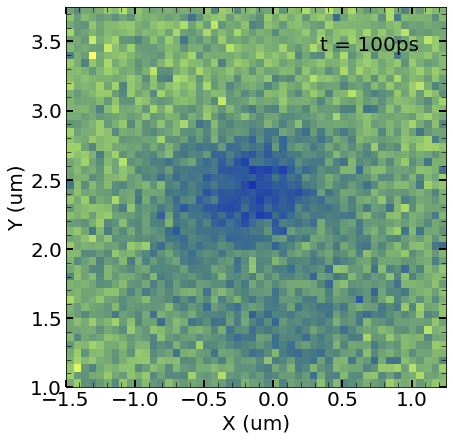

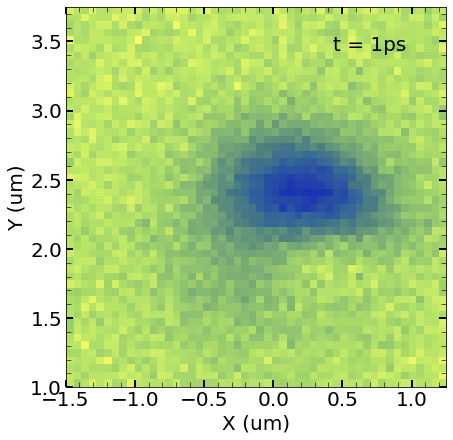

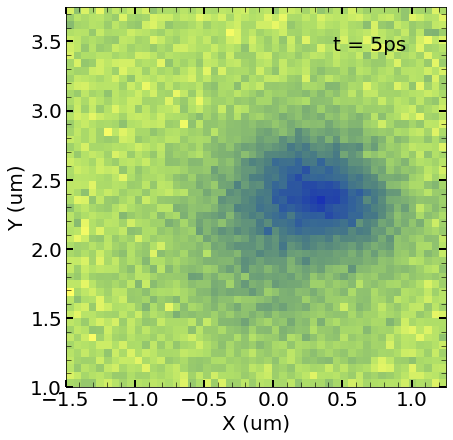

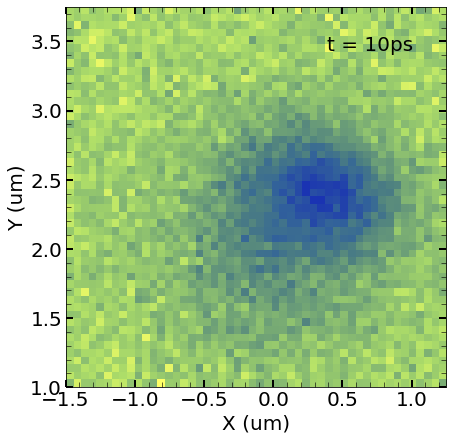

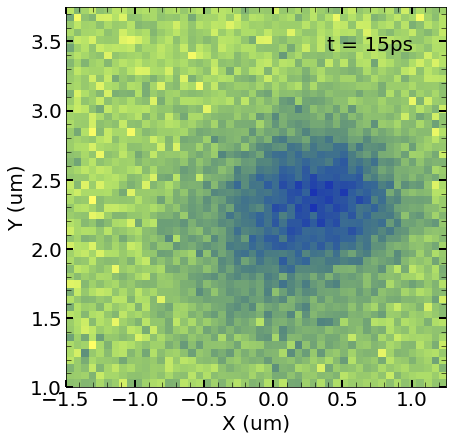

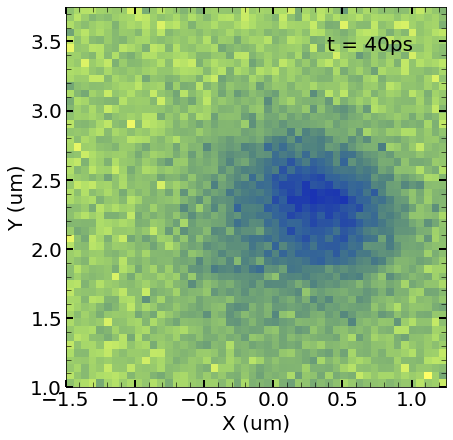

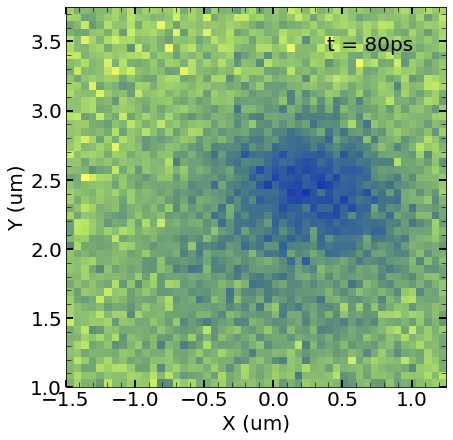

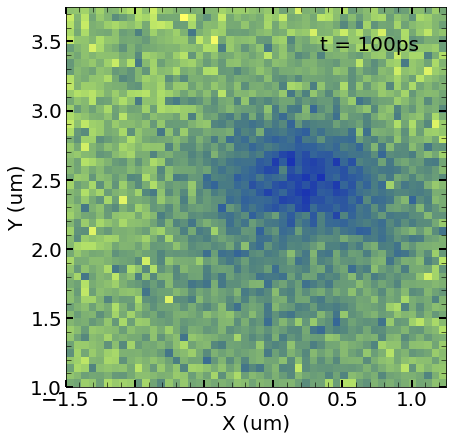

In [17]:
#Testing new function that does the same thing
R1 = SpatiallySeparated.mkGIF('D1-5/Spot/D5/R1')
R2 = SpatiallySeparated.mkGIF('D1-5/Spot/D5/R2')
R3 = SpatiallySeparated.mkGIF('D1-5/Spot/D5/R3')